In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
maru_data = pd.read_csv("maru_data.csv")

In [3]:
maru_data

,segments,contact_cost,response_rate,workers_needed,worker_labor_cost_per_hr,instructors_needed,instructor_labor_cost_per_hr,price_per_hr,annual_hours,retention_rate,interest_rate
0,little leaguers,1000,0.100,2,1500,1,3000,6500,10.0,0.75,0.1
1,summer sluggers,1500,0.150,1,1500,0,0,3000,4.0,0.50,0.1
2,elite ballplayers (print ad),300,0.005,1,1500,1,4500,7500,20.0,0.60,0.1
3,elite ballplayers (party),12500,0.250,1,1500,1,4500,7500,20.0,0.60,0.1
4,entertainment seekers,50,0.025,2,1500,0,0,4000,1.5,0.35,0.1


# **Part I: Case Questions**

## **Calculate annual margin**

In [4]:
maru_data['total_cost_per_hr'] = (maru_data['instructor_labor_cost_per_hr'] * maru_data['instructors_needed'] +
                                  maru_data['worker_labor_cost_per_hr'] * maru_data['workers_needed'])
maru_data['margin_hr'] = maru_data['price_per_hr'] - maru_data['total_cost_per_hr']
maru_data['annual_margin'] = maru_data['margin_hr'] * maru_data['annual_hours']

In [5]:
maru_data['annual_margin']

0     5000.0
1     6000.0
2    30000.0
3    30000.0
4     1500.0
Name: annual_margin, dtype: float64

## **Case Q1: Calculate aquisition cost**

In [11]:
maru_data['acquisition_cost'] = maru_data['contact_cost'] / maru_data['response_rate']
maru_data['acquisition_cost']

0    10000.0
1    10000.0
2    60000.0
3    50000.0
4     2000.0
Name: acquisition_cost, dtype: float64

## **Case Q3: Calculating Customer Lifetime Value (CLV) with Infinite Time Horizon**
The formula used is:

$$
\text{Net CLV} = \left(M \times \frac{(1 + i)}{(1 + i - R)}\right) - \text{AC}
$$

where:
- **`M`**: The annual margin for each customer.
- **`i`**: The interest rate (or discount rate).
- **`R`**: The retention rate, or the probability of a customer staying each period.
- **`AC`**: The acquisition cost per customer.


In [13]:
maru_data['clv'] = (maru_data['annual_margin'] *
                    ((1 + maru_data['interest_rate']) / (1 + maru_data['interest_rate'] - maru_data['retention_rate'])) -
                    maru_data['acquisition_cost'])

In [15]:
maru_data['clv']

0     5714.285714
1     1000.000000
2     6000.000000
3    16000.000000
4      200.000000
Name: clv, dtype: float64

## **Case Q4: The most attractive customer segment**

The Elite Ballplayers (Party) have the highest CLV among all the other segments. And that is the type of customers that will generate higher revenue in the future.

In [17]:
maru_data

,segments,contact_cost,response_rate,workers_needed,worker_labor_cost_per_hr,instructors_needed,instructor_labor_cost_per_hr,price_per_hr,annual_hours,retention_rate,interest_rate,total_cost_per_hr,margin_hr,annual_margin,acquisition_cost,clv
0,little leaguers,1000,0.100,2,1500,1,3000,6500,10.0,0.75,0.1,6000,500,5000.0,10000.0,5714.285714
1,summer sluggers,1500,0.150,1,1500,0,0,3000,4.0,0.50,0.1,1500,1500,6000.0,10000.0,1000.000000
2,elite ballplayers (print ad),300,0.005,1,1500,1,4500,7500,20.0,0.60,0.1,6000,1500,30000.0,60000.0,6000.000000
3,elite ballplayers (party),12500,0.250,1,1500,1,4500,7500,20.0,0.60,0.1,6000,1500,30000.0,50000.0,16000.000000
4,entertainment seekers,50,0.025,2,1500,0,0,4000,1.5,0.35,0.1,3000,1000,1500.0,2000.0,200.000000


## **Case Q5: Chiyoda ward**

In [3]:
## For Chiyoda
contact_cost = 600	
response_rate = 0.08
retention_rate = 0.65
annual_hours = 10
interest_rate = 0.1


#Acquisition Cost
acquisition_cost = contact_cost / response_rate

# Annual Margin
annual_margin = (6500-6000)*10

#clv
clv = ((annual_margin * (1 + interest_rate)) / (1 + interest_rate - retention_rate) - acquisition_cost)
print(f"CLV for Chiyoda ward customer: {clv:.2f}")

CLV for Chiyoda ward customer: 4722.22


* Note: MBC should not sponsor Chiyoda Ward. Because Minato Ward has a higher Net CLV (5714.29) compared to Chiyoda Ward (4722.22). Chiyoda Ward has a significantly higher Net CLV (¥9,444.44) compared to Minato Ward (¥5,714.29). Even though the CAC in Chiyoda is lower (¥7,500 vs. ¥10,000), the CLV gain (¥12,222.22) makes it a better financial decision.

## **Case Q6: Elite ballplayers discount**

In [21]:
import pandas as pd

# New Proposal
proposal_data = {
    'contact_cost': 12500,
    'response_rate': 0.250,
    'workers_needed': 1,
    'worker_labor_cost_per_hr': 1500,
    'instructors_needed': 1,
    'instructor_labor_cost_per_hr': 4500,
    'price_per_hr': 7000,
    'annual_hours': 20,
    'retention_rate': 0.75,
    'interest_rate': 0.1
}

# annual_margin
margin_hr = 1000
annual_margin = margin_hr * proposal_data['annual_hours']

# acquisition_cost
acquisition_cost = 50000

# CLV
clv = annual_margin * ((1 + proposal_data['interest_rate']) / 
                       (1 + proposal_data['interest_rate'] - proposal_data['retention_rate'])) - acquisition_cost

print("annual_margin:", annual_margin)
print("CLV:", clv)


annual_margin: 20000
CLV: 12857.142857142848


MBC should NOT offer the ¥500/hour discount.Current Net CLV (¥16,000) is higher than the New Net CLV (¥12,857) after applying the discount.Even though the discount improves the retention rate, the loss in revenue per session outweighs this benefit.

# Part II Sensitivity Analysis

In [23]:
# Baseline values for the "Elite-Ballplayers (Party)" segment
baseline_ac = 50000  # Acquisition cost
baseline_am = 30000  # Annual margin
baseline_rr = 0.60   # Retention rate
interest_rate = 0.10  # Discount rate

In [25]:
# Define alternative values for sensitivity analysis
ac_values = np.array([40000, 45000, 50000, 55000, 60000])  # Acquisition cost scenarios
am_values = np.array([20000, 25000, 30000, 35000, 40000])  # Annual margin scenarios
rr_values = np.array([0.30, 0.45, 0.60, 0.75, 0.90])  # Retention rate scenarios

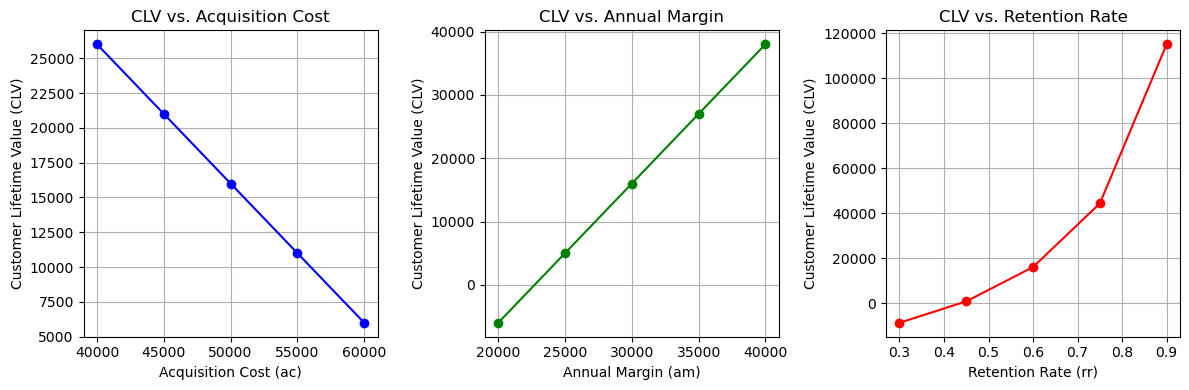

In [27]:
def calculate_clv(am, ac, rr, interest_rate):
    return (am * ((1 + interest_rate) / (1 + interest_rate - rr))) - ac

# Calculating CLB=V
clv_ac = [calculate_clv(baseline_am, ac, baseline_rr, interest_rate) for ac in ac_values]
clv_am = [calculate_clv(am, baseline_ac, baseline_rr, interest_rate) for am in am_values]
clv_rr = [calculate_clv(baseline_am, baseline_ac, rr, interest_rate) for rr in rr_values]

# Graph of Acquisition Cost
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(ac_values, clv_ac, marker='o', linestyle='-', color='b')
plt.xlabel('Acquisition Cost (ac)')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('CLV vs. Acquisition Cost')
plt.grid()

# Graph of Annual Margin 
plt.subplot(1, 3, 2)
plt.plot(am_values, clv_am, marker='o', linestyle='-', color='g')
plt.xlabel('Annual Margin (am)')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('CLV vs. Annual Margin')
plt.grid()

# Graph of Retention Rate
plt.subplot(1, 3, 3)
plt.plot(rr_values, clv_rr, marker='o', linestyle='-', color='r')
plt.xlabel('Retention Rate (rr)')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('CLV vs. Retention Rate')
plt.grid()

plt.tight_layout()
plt.show()

The Retention Rate

# **Part III Monte Carlo**

# Step 1: Extract values for elite ballplayers

In [31]:
elite_ballplayers = maru_data.iloc[3]  # 4th row in zero-indexed Python
ac = elite_ballplayers["acquisition_cost"]
m = elite_ballplayers["annual_margin"]
r = elite_ballplayers["retention_rate"]
elite_ballplayers_clvaggregate = elite_ballplayers["clv"]

In [33]:
ac

50000.0

In [35]:
m

30000.0

In [37]:
r

0.6

# Step 2: Load and analyze customer data for margins

In [29]:
# Load the customer margin data as a DataFrame and convert it to a Series
customers= pd.read_csv("customers.csv", header=None)
customers

,0
0,32101.38188
1,31824.26642
2,36026.44128
3,29321.40836
4,25518.51806
...,...
495,31478.14581
496,30472.63742
497,30422.50571
498,24853.16627


In [29]:
# Load the customer margin data as a DataFrame and convert it to a Series
customers= pd.read_csv("customers.csv", header=None)
customers

,0
0,32101.38188
1,31824.26642
2,36026.44128
3,29321.40836
4,25518.51806
...,...
495,31478.14581
496,30472.63742
497,30422.50571
498,24853.16627


(array([ 3.,  1.,  4.,  7., 13., 17., 26., 37., 49., 39., 65., 65., 53.,
        35., 37., 24., 15.,  3.,  2.,  5.]),
 array([14812.93368 , 16231.514802, 17650.095924, 19068.677046,
        20487.258168, 21905.83929 , 23324.420412, 24743.001534,
        26161.582656, 27580.163778, 28998.7449  , 30417.326022,
        31835.907144, 33254.488266, 34673.069388, 36091.65051 ,
        37510.231632, 38928.812754, 40347.393876, 41765.974998,
        43184.55612 ]),
 <BarContainer object of 20 artists>)

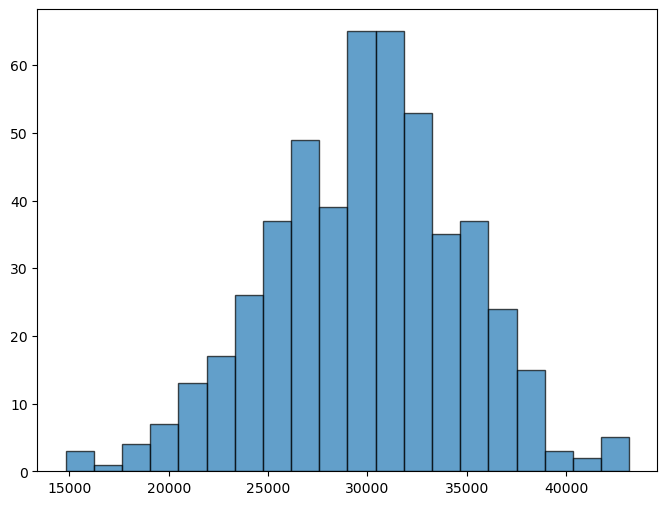

In [39]:
# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(customers[0], bins=20, edgecolor='black', alpha=0.7)

In [55]:
margin_mean = customers.mean()
margin_mean

0    29949.879055
dtype: float64

In [57]:
margin_std = customers.std()
margin_std

0    4798.066392
dtype: float64

# Step 3: Define parameters and simulate customer data

In [59]:
from scipy.stats import norm
margin_dist = norm(loc=margin_mean, scale=margin_std)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


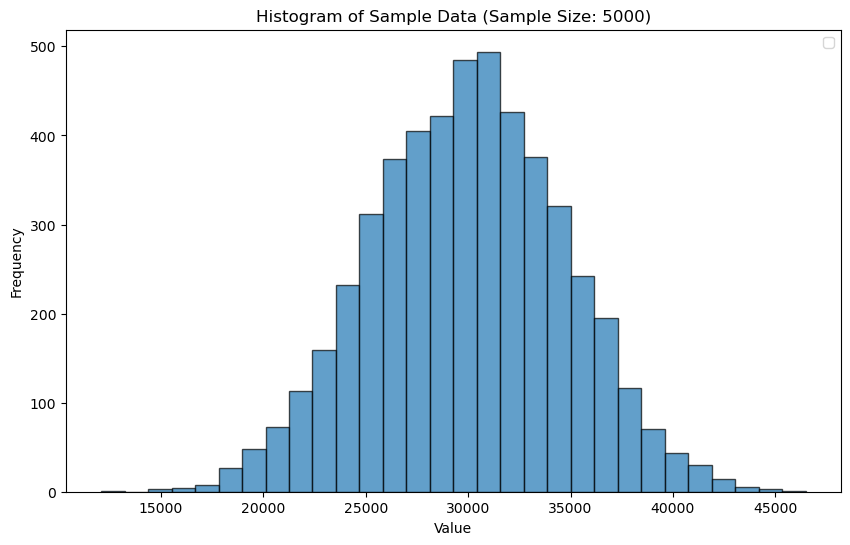

In [152]:
sample_size = 5000
sample_data = margin_dist.rvs(size=sample_size)

plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=30, edgecolor='black', alpha=0.7)

plt.title(f"Histogram of Sample Data (Sample Size: {sample_size})")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 4: Simulate retention rate using various Beta distributions and then calculate CLV

In [83]:
from scipy.stats import beta

In [85]:
alpha = 6
beta_param = alpha * (1 - 0.60) / 0.60

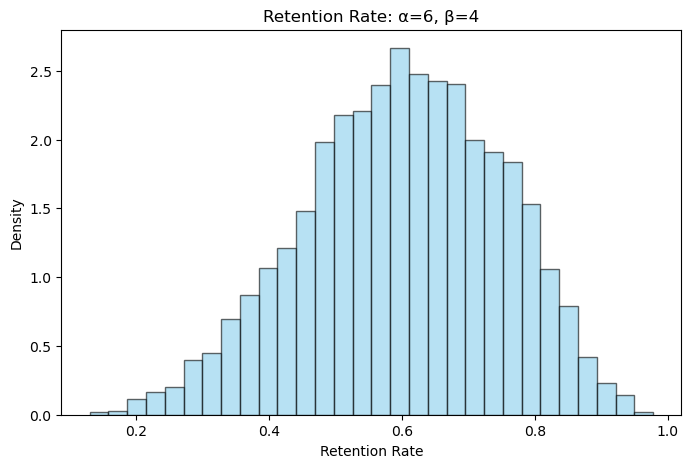

In [125]:
num_samples = 5000
r_vec = beta.rvs(alpha, beta_param, size=num_samples)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(r_vec, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Retention Rate: α=6, β=4")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.show()

In [136]:
retention_dist = beta(alpha, beta_param)
##change the number of customers
num_customers = 5000
np.random.seed(42)

simulated_margins = margin_dist.rvs(size=num_customers)
simulated_retention = retention_dist.rvs(size=num_customers)

simulated_clv = calculate_clv(simulated_margins, ac, simulated_retention, interest_rate)
simulated_clv

array([24421.92556767, 62911.09944782, 15642.39144513, ...,
       42375.6115615 , 77627.76962591, 21017.02776763])

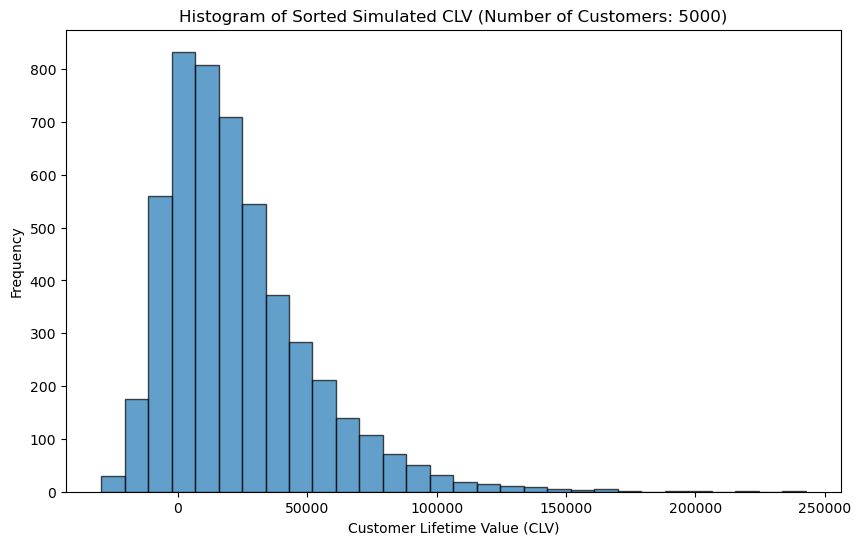

In [150]:
simulated_clv_sorted = np.sort(simulated_clv)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(simulated_clv_sorted, bins=30, edgecolor='black', alpha=0.7)

plt.title(f"Histogram of Sorted Simulated CLV (Number of Customers: {num_customers})")
plt.xlabel("Customer Lifetime Value (CLV)")
plt.ylabel("Frequency")
plt.show()

# Step 5: Whale Plot

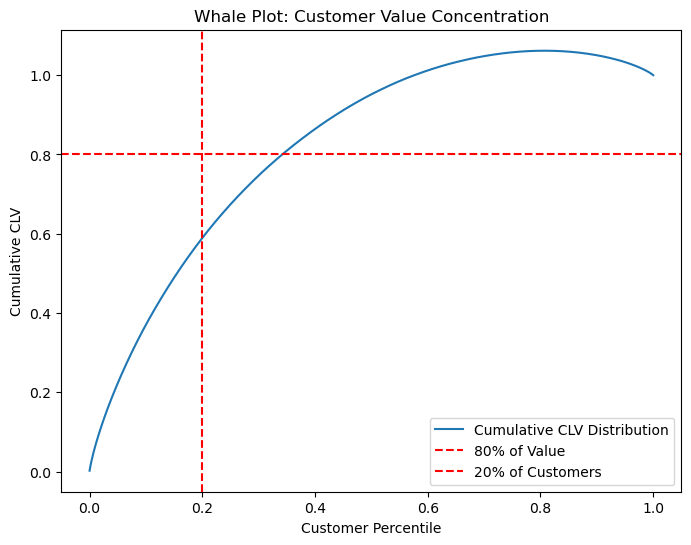

In [154]:
sorted_clv = np.sort(simulated_clv)[::-1]  
cumulative_value = np.cumsum(sorted_clv) / np.sum(sorted_clv)
customer_percentiles = np.linspace(0, 1, num_customers)

plt.figure(figsize=(8, 6))
plt.plot(customer_percentiles, cumulative_value, label="Cumulative CLV Distribution")
plt.axhline(0.8, color='red', linestyle='dashed', label="80% of Value")
plt.axvline(0.2, color='red', linestyle='dashed', label="20% of Customers")
plt.title("Whale Plot: Customer Value Concentration")
plt.xlabel("Customer Percentile")
plt.ylabel("Cumulative CLV")
plt.legend()
plt.show()


In [134]:
simulated_clv_mean = simulated_clv.mean()
simulated_clv_std = simulated_clv.std()
print(f"Simulated CLV Mean: {simulated_clv_mean:.2f}, Std: {simulated_clv_std:.2f}")
print(f"Aggregate CLV: {elite_ballplayers_clvaggregate:.2f}")

Simulated CLV Mean: 22858.28, Std: 28257.58
Aggregate CLV: 16000.00
